In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

kapaa us
bad frankenhausen de
rognan no
mayo ca
rikitea pf
jinchang cn
barrow us
qaanaaq gl
at-bashi kg
canaries lc
vardo no
sidi ali dz
rikitea pf
ushuaia ar
punta arenas cl
port blair in
nizhneyansk ru
schruns at
hobart au
umzimvubu za
shakawe bw
carnarvon au
tadine nc
ribeira grande pt
hilo us
barrow us
thompson ca
port alfred za
puerto ayora ec
bom jesus br
hofn is
vaini to
hobart au
busselton au
belaya gora ru
jamestown sh
jumla np
tiksi ru
cabo san lucas mx
praia cv
severo-kurilsk ru
kununurra au
la ronge ca
prado br
marcona pe
longyearbyen sj
hermanus za
marawi sd
severo-kurilsk ru
vestmannaeyjar is
mount isa au
seoul kr
ushuaia ar
ushuaia ar
ribeira grande pt
bluff nz
hithadhoo mv
kirakira sb
tuktoyaktuk ca
khatanga ru
hithadhoo mv
hobart au
jamestown sh
khatanga ru
najran sa
bluff nz
tuktoyaktuk ca
quesnel ca
mataura pf
talnakh ru
thompson ca
jamestown sh
port alfred za
long xuyen vn
qaanaaq gl
nador ma
arraial do cabo br
barentsburg sj
tumannyy ru
kastamonu tr
dunedin nz
hilo

lebu cl
ushuaia ar
hobart au
new norfolk au
xingyi cn
ponta do sol cv
podyuga ru
torbay ca
vaini to
provideniya ru
ushuaia ar
upernavik gl
coolum beach au
hashtrud ir
cherskiy ru
marquette us
atuona pf
avarua ck
avarua ck
grootfontein na
tacuarembo uy
ushuaia ar
pingliang cn
isangel vu
luanda ao
kaitangata nz
sangmelima cm
qaanaaq gl
punta arenas cl
narsaq gl
kaitangata nz
qaanaaq gl
mataura pf
sao filipe cv
longyearbyen sj
lavrentiya ru
east london za
bambous virieux mu
sur om
contamana pe
taolanaro mg
clearlake us
raga sd
san vicente ph
butaritari ki
mount gambier au
saint-philippe re
mar del plata ar
katsuura jp
zhigansk ru
mar del plata ar
auki sb
nikolskoye ru
bluff nz
bluff nz
alnavar in
yanam in
busselton au
acapulco mx
rikitea pf
mys shmidta ru
florencia co
rikitea pf
ushuaia ar
vaini to
sobolevo ru
puerto gaitan co
ushuaia ar
acapulco mx
punta arenas cl
vaini to
kalmunai lk
kodinar in
naze jp
vaini to
severo-kurilsk ru
nianzishan cn
torbay ca
kavieng pg
guadalupe y calvo mx
sa

lompoc us
barentsburg sj
punta arenas cl
culfa az
taoudenni ml
rikitea pf
mindelo cv
vao nc
porto novo cv
hilo us
buta cd
smithers ca
udachnyy ru
riohacha co


In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

627

In [7]:
import requests
requests.__version__

'2.24.0'

In [8]:
# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41f401917bde9b054e58b839670066e9


In [10]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | bad frankenhausen
Processing Record 3 of Set 1 | rognan
Processing Record 4 of Set 1 | mayo
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | jinchang
Processing Record 7 of Set 1 | barrow
Processing Record 8 of Set 1 | qaanaaq
Processing Record 9 of Set 1 | at-bashi
Processing Record 10 of Set 1 | canaries
Processing Record 11 of Set 1 | vardo
Processing Record 12 of Set 1 | sidi ali
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | port blair
Processing Record 16 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 17 of Set 1 | schruns
Processing Record 18 of Set 1 | hobart
Processing Record 19 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 20 of Set 1 | shakawe
Processing Record 21 of Set 1 | carnarvon
Processing Record 22 of Set 1 | t

Processing Record 37 of Set 4 | bambous virieux
Processing Record 38 of Set 4 | vila
Processing Record 39 of Set 4 | kavieng
Processing Record 40 of Set 4 | tautira
Processing Record 41 of Set 4 | hami
Processing Record 42 of Set 4 | neiafu
Processing Record 43 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 44 of Set 4 | jahrom
City not found. Skipping...
Processing Record 45 of Set 4 | banjar
Processing Record 46 of Set 4 | xinmin
Processing Record 47 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 48 of Set 4 | chuy
Processing Record 49 of Set 4 | gold coast
Processing Record 50 of Set 4 | ilo
Processing Record 1 of Set 5 | saskylakh
Processing Record 2 of Set 5 | adrar
Processing Record 3 of Set 5 | severomuysk
Processing Record 4 of Set 5 | zlitan
Processing Record 5 of Set 5 | eyl
Processing Record 6 of Set 5 | durban
Processing Record 7 of Set 5 | we
City not found. Skipping...
Processing Record 8 of Set 5 | isangel
Processing Re

Processing Record 22 of Set 8 | ordynskoye
Processing Record 23 of Set 8 | camacha
Processing Record 24 of Set 8 | dakar
Processing Record 25 of Set 8 | hovd
Processing Record 26 of Set 8 | seevetal
Processing Record 27 of Set 8 | provideniya
Processing Record 28 of Set 8 | pangai
Processing Record 29 of Set 8 | rio grande
Processing Record 30 of Set 8 | mayna
Processing Record 31 of Set 8 | la orilla
Processing Record 32 of Set 8 | longyan
Processing Record 33 of Set 8 | chokurdakh
Processing Record 34 of Set 8 | bolgatanga
Processing Record 35 of Set 8 | kilembe
Processing Record 36 of Set 8 | pangoa
Processing Record 37 of Set 8 | muravlenko
Processing Record 38 of Set 8 | kitob
Processing Record 39 of Set 8 | xingyi
Processing Record 40 of Set 8 | podyuga
Processing Record 41 of Set 8 | coolum beach
Processing Record 42 of Set 8 | hashtrud
Processing Record 43 of Set 8 | marquette
Processing Record 44 of Set 8 | grootfontein
Processing Record 45 of Set 8 | tacuarembo
Processing Rec

Processing Record 14 of Set 12 | bambanglipuro
Processing Record 15 of Set 12 | lerwick
Processing Record 16 of Set 12 | antofagasta
Processing Record 17 of Set 12 | pipar
Processing Record 18 of Set 12 | akyab
Processing Record 19 of Set 12 | dzhusaly
City not found. Skipping...
Processing Record 20 of Set 12 | garowe
Processing Record 21 of Set 12 | kuryk
Processing Record 22 of Set 12 | requena
Processing Record 23 of Set 12 | sinnamary
Processing Record 24 of Set 12 | marsa matruh
Processing Record 25 of Set 12 | guanica
Processing Record 26 of Set 12 | ust-omchug
Processing Record 27 of Set 12 | gidam
Processing Record 28 of Set 12 | sentyabrskiy
City not found. Skipping...
Processing Record 29 of Set 12 | barth
Processing Record 30 of Set 12 | pevek
Processing Record 31 of Set 12 | northam
Processing Record 32 of Set 12 | marshall
Processing Record 33 of Set 12 | berberati
Processing Record 34 of Set 12 | winnipeg
Processing Record 35 of Set 12 | kokopo
Processing Record 36 of Se

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.08,-159.32,80.60,78,40,11.41,US,2020-08-23 17:50:06
1,Bad Frankenhausen,51.35,11.10,70.00,52,14,7.00,DE,2020-08-23 17:52:45
2,Rognan,67.10,15.39,52.00,92,95,4.25,NO,2020-08-23 17:52:45
3,Mayo,38.89,-76.51,88.00,78,1,9.17,US,2020-08-23 17:52:45
4,Rikitea,-23.12,-134.97,69.71,83,73,23.49,PF,2020-08-23 17:49:57
5,Jinchang,38.50,102.17,70.99,34,3,7.99,CN,2020-08-23 17:52:45
6,Barrow,71.29,-156.79,37.40,100,90,14.99,US,2020-08-23 17:47:46
7,Qaanaaq,77.48,-69.36,37.65,83,100,2.15,GL,2020-08-23 17:50:02
8,At-Bashi,41.17,75.81,57.45,36,0,2.37,KG,2020-08-23 17:52:45
9,Canaries,28.00,-15.50,86.00,42,20,27.51,ES,2020-08-23 17:52:45


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [14]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2020-08-23 17:50:06,22.08,-159.32,80.60,78,40,11.41
1,Bad Frankenhausen,DE,2020-08-23 17:52:45,51.35,11.10,70.00,52,14,7.00
2,Rognan,NO,2020-08-23 17:52:45,67.10,15.39,52.00,92,95,4.25
3,Mayo,US,2020-08-23 17:52:45,38.89,-76.51,88.00,78,1,9.17
4,Rikitea,PF,2020-08-23 17:49:57,-23.12,-134.97,69.71,83,73,23.49
...,...,...,...,...,...,...,...,...,...
563,Mindelo,CV,2020-08-23 17:53:21,16.89,-24.98,79.43,81,65,3.00
564,Porto Novo,BJ,2020-08-23 17:53:21,6.50,2.60,76.14,78,81,7.25
565,Buta,CD,2020-08-23 17:49:46,2.79,24.73,68.68,97,100,1.59
566,Smithers,CA,2020-08-23 17:53:21,54.78,-127.17,53.60,81,75,2.24


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

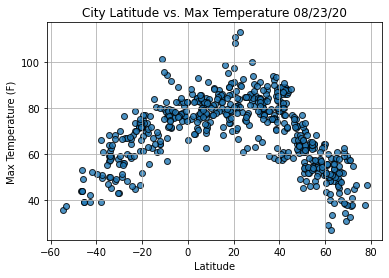

In [18]:
import time
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

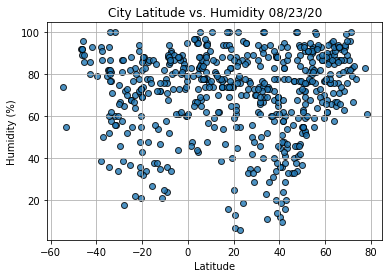

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

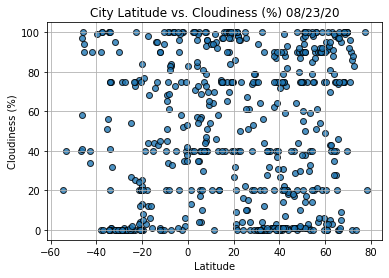

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

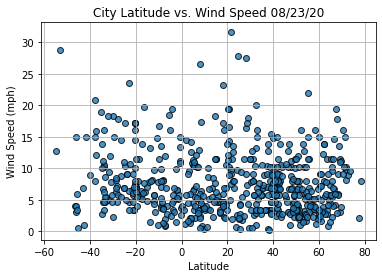

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()